<a href="https://colab.research.google.com/github/dbetm/DeepLearningLifeSciences/blob/main/04_Molecules/SMARTS_Strings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In chemiinformatics, we have challenges when we want to determine whether atoms in a molecule match a particular pattern.

SMARTS is an extension of the SMILES (Simplified molecular-input line-entry system) language.

One can think of SMARTS patterns as similar to regular
expressions used for searching text.

In [ ]:
# Set up
!pip install --pre deepchem
import deepchem
deepchem.__version__

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3501  100  3501    0     0  18822      0 --:--:-- --:--:-- --:--:-- 18822


add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.10
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added conda-forge to channels
added omnia to channels
done
conda packages installation finished!


# conda environments:
#
base                  *  /root/miniconda

     |████████████████████████████████| 573kB 3.8MB/s 


'2.6.0.dev'

We'll work with the next molecules

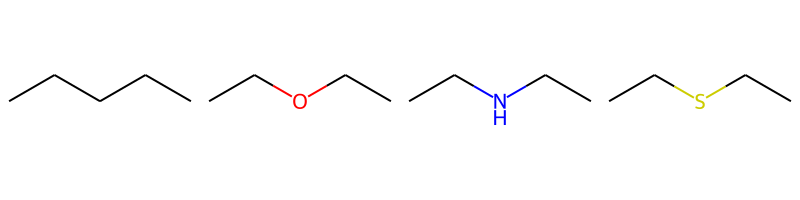

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

# Create a list of molecules
smiles = ["CCCCC","CCOCC","CCNCC","CCSCC"]
molecules = [Chem.MolFromSmiles(x) for x in smiles]

MolsToGridImage(mols=molecules, molsPerRow=4)

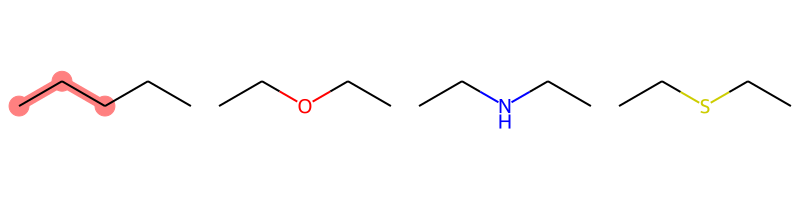

In [ ]:
# Which SMILES strings match the SMARTS pattern "CCC"?
query = Chem.MolFromSmarts('CCC')
# Only get the first match per molecule
matches = [molecule.GetSubstructMatch(query) for molecule in molecules]

# Visualize the matches
MolsToGridImage(mols=molecules, molsPerRow=4, highlightAtomLists=matches)

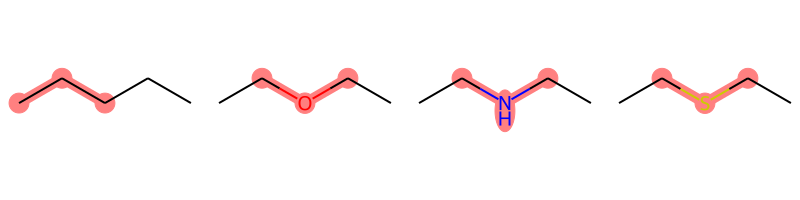

In [ ]:
# Which SMILES strings match the SMARTS pattern "C*C"? 
# It'll match an aliphatic carbon attached to any atom attached to another carbon.
query = Chem.MolFromSmarts('C*C')
# Only get the first match per molecule
matches = [molecule.GetSubstructMatch(query) for molecule in molecules]

# Visualize the matches
MolsToGridImage(mols=molecules, molsPerRow=4, highlightAtomLists=matches)

The string “C[C,O,N]C” will match carbon attached to carbon, oxygen, or nitrogen, attached to another carbon.

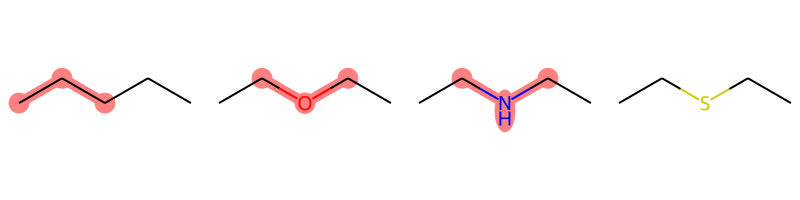

In [ ]:
query = Chem.MolFromSmarts('C[C,N,O]C')
matches = [molecule.GetSubstructMatch(query) for molecule in molecules]

# Visualize the matches
MolsToGridImage(mols=molecules, molsPerRow=4, highlightAtomLists=matches)

There is a lot more to SMARTS.